# **Assignment 3, Foundations of Machine Learning (DA54OO)**

Vinnay Gupta, ED22B073


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
333,ham,Any chance you might have had with me evaporat...,NaN,NaN,NaN
876,ham,Are you in castor? You need to see something,NaN,NaN,NaN
3437,ham,Its good to hear from you,NaN,NaN,NaN
4119,ham,Babe! How goes that day ? What are you up to ?...,NaN,NaN,NaN
249,spam,Congratulations ur awarded 500 of CD vouchers ...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Prediction

## 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
4484,ham,What not under standing.
2606,ham,R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...
3062,spam,"Hi babe its Jordan, how r u? Im home from abro..."
4281,ham,U can call now...
4082,ham,"Good afternoon, my love. It was good to see yo..."


In [ ]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
label_map = {'ham': 0, 'spam': 1}
df['target'] = df['target'].map(label_map)
print(df.head())

   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

## 2.EDA

In [ ]:
import matplotlib.pyplot as plt
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


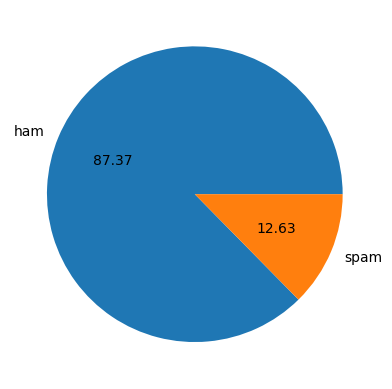

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()
plt.savefig('ratio.png')

In [ ]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

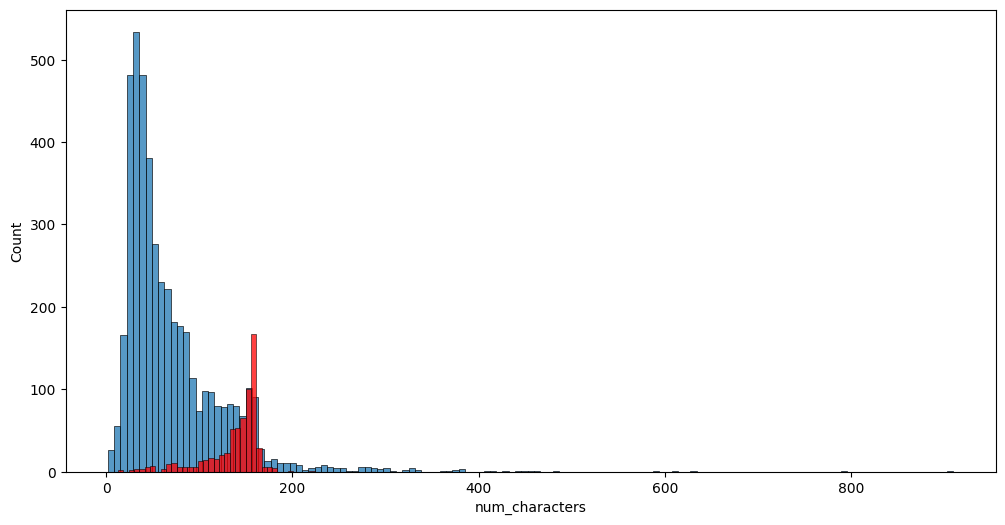

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.savefig('spam distribution.png')

<Axes: xlabel='num_words', ylabel='Count'>

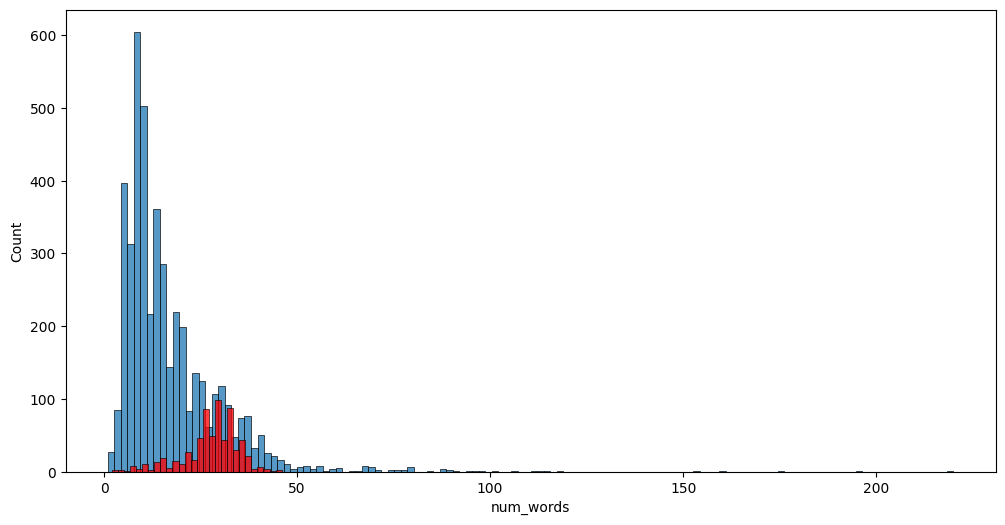

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

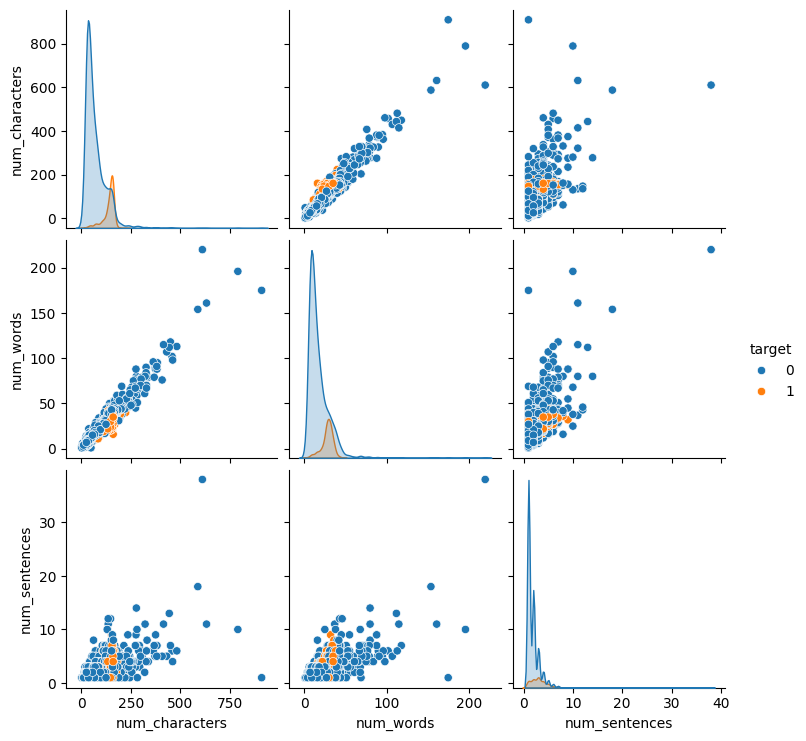

In [ ]:
pplot= sns.pairplot(df,hue='target')
pplot.savefig("pairplots.png")

<Axes: >

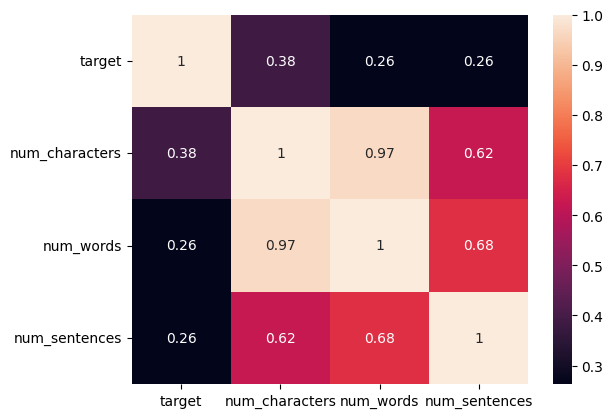

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation and plot
sns.heatmap(numerical_df.corr(), annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

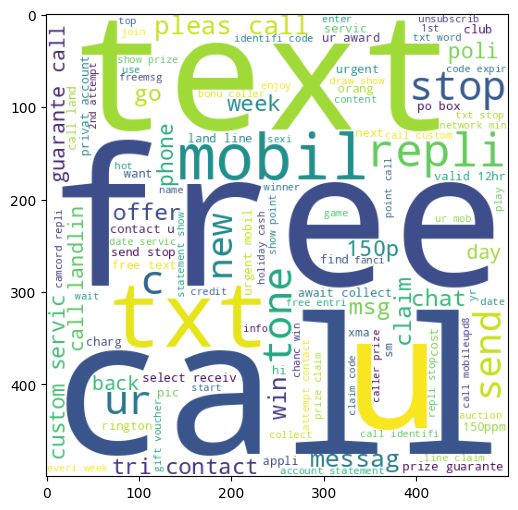

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.savefig('common spam words.png')

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

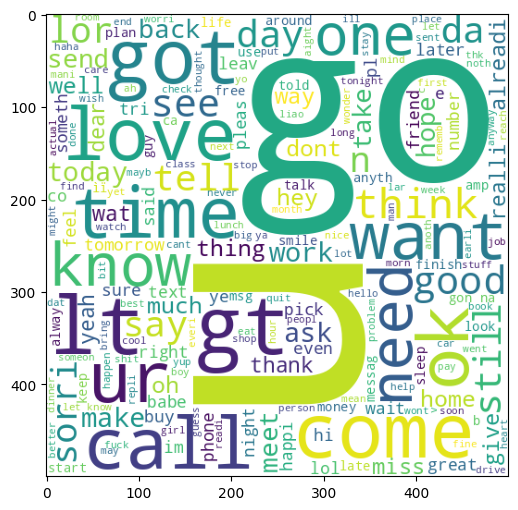

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.savefig('common non spam words.png')

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)

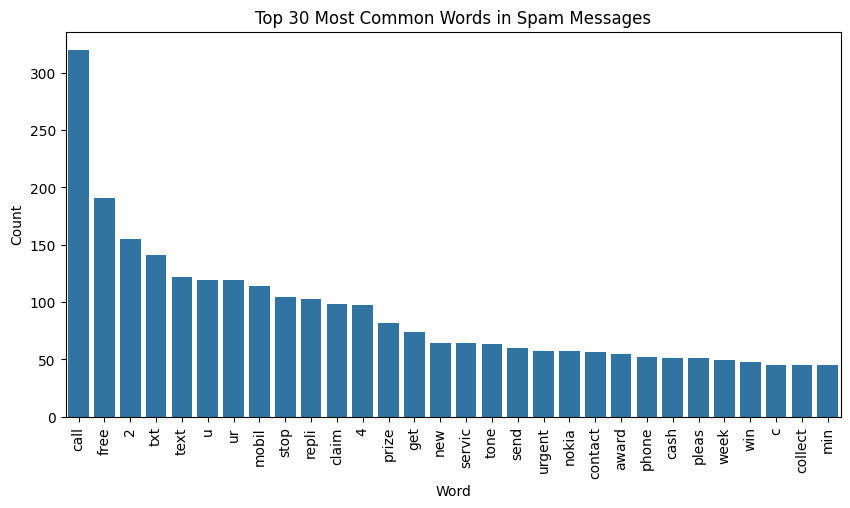

<Figure size 640x480 with 0 Axes>

In [ ]:
top_30_words = Counter(spam_corpus).most_common(30)
df_top_30 = pd.DataFrame(top_30_words, columns=['Word', 'Count'])
plt.figure(figsize=(10, 5)) # Set figure size for better visualization
sns.barplot(x='Word', y='Count', data=df_top_30)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()
plt.savefig('top 30 spam.png')

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

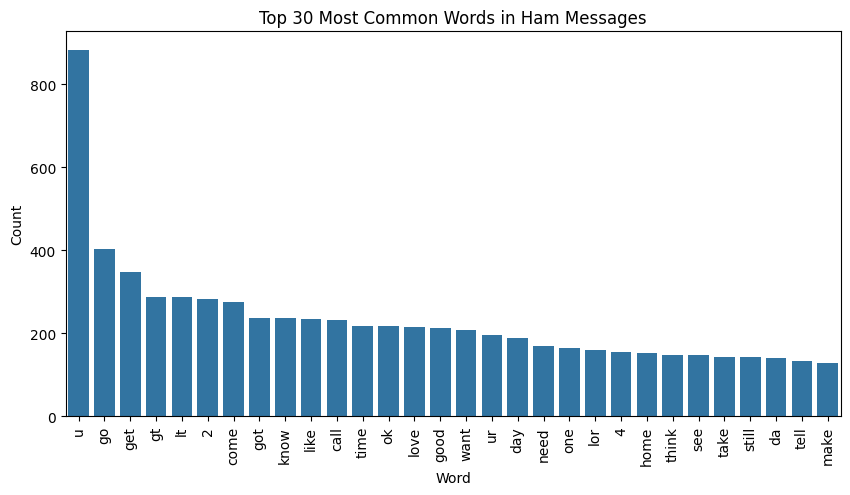

<Figure size 640x480 with 0 Axes>

In [ ]:
top_30_words = Counter(ham_corpus).most_common(30)
df_top_30 = pd.DataFrame(top_30_words, columns=['Word', 'Count'])
plt.figure(figsize=(10, 5)) # Set figure size for better visualization
sns.barplot(x='Word', y='Count', data=df_top_30)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()
plt.savefig('top 30 ham.png')

In [ ]:
# Text Vectorization
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [ ]:
import math
import os
import re
import random

In [ ]:
transformed_text_list = df['transformed_text'].tolist()
target_list = df['target'].tolist()

In [ ]:
def custom_train_test_split(X, y, test_size=0.2, random_state=42):
    """
    Performs a simple, non-stratified random train/test split.
    """
    # Ensure X and y are lists/arrays of the same length
    if len(X) != len(y):
        raise ValueError("X and y must have the same length.")

    # Get indices and shuffle them
    indices = list(range(len(X)))
    # Simple custom shuffle (or rely on Python's standard 'random' module for shuffling)
    import random
    random.seed(random_state)
    random.shuffle(indices)

    # Calculate split point
    test_count = int(len(X) * test_size)

    # Split indices
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]

    # Split data
    X_train = [X[i] for i in train_indices]
    X_test = [X[i] for i in test_indices]
    y_train = [y[i] for i in train_indices]
    y_test = [y[i] for i in test_indices]

    return X_train, X_test, y_train, y_test

In [ ]:
class CustomTfidfVectorization:
    """
    Simulates TF-IDF vectorization from scratch.
    This is a simplified Bag-of-Words implementation that counts token frequency.
    """
    def __init__(self, max_features=3000):
        self.max_features = max_features
        self.vocabulary = {} # {word: index}
        self.feature_names = []

    def fit(self, documents):
        """Builds the vocabulary from the documents."""
        word_counts = {}
        for doc in documents:
            for word in doc.split():
                word_counts[word] = word_counts.get(word, 0) + 1

        # Sort by frequency and select top max_features
        sorted_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)
        top_words = [word for word, count in sorted_counts[:self.max_features]]

        # Create vocabulary map
        for i, word in enumerate(top_words):
            self.vocabulary[word] = i
            self.feature_names.append(word)

    def transform(self, documents):
        """Creates the feature matrix based on word counts (simple TF)."""
        X = []

        for doc in documents:
            feature_vector = [0] * len(self.feature_names)
            for word in doc.split():
                if word in self.vocabulary:
                    idx = self.vocabulary[word]
                    feature_vector[idx] += 1
            X.append(feature_vector)

        return X

    def fit_transform(self, documents):
        """Fits vocabulary and transforms documents."""
        self.fit(documents)
        return self.transform(documents)

In [ ]:
class CustomMinMaxScaler:
    """
    Performs Min-Max Scaling (normalization) from scratch.
    """
    def __init__(self):
        self.min_val = None
        self.max_val = None

    def fit(self, X):
        """Calculates min and max for each feature column."""
        # Convert X (list of lists) into columns
        num_features = len(X[0])
        self.min_val = [float('inf')] * num_features
        self.max_val = [float('-inf')] * num_features

        for row in X:
            for i in range(num_features):
                if row[i] < self.min_val[i]:
                    self.min_val[i] = row[i]
                if row[i] > self.max_val[i]:
                    self.max_val[i] = row[i]

    def transform(self, X):
        """Applies Min-Max scaling to the data."""
        X_scaled = []
        for row in X:
            scaled_row = []
            for i, val in enumerate(row):
                min_i = self.min_val[i]
                max_i = self.max_val[i]

                if max_i == min_i:
                    # Avoid division by zero: set to 0 if min == max
                    scaled_val = 0.0
                else:
                    scaled_val = (val - min_i) / (max_i - min_i)
                scaled_row.append(scaled_val)
            X_scaled.append(scaled_row)
        return X_scaled

    def fit_transform(self, X):
        """Fits and transforms the data."""
        self.fit(X)
        return self.transform(X)

class CustomMultinomialNB:
    """
    A simple Multinomial Naive Bayes classifier implementation for text.
    Uses Laplace smoothing (alpha=1).
    """
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.class_log_prior = {}
        self.feature_log_prob = {}
        self.classes = []
        self.vocab_size = 0

    def fit(self, X, y):
        """
        Trains the Naive Bayes model.

        X: List of feature vectors (lists/arrays of counts/values).
        y: List of integer labels (0 or 1).
        """
        # Find unique classes
        self.classes = sorted(list(set(y)))

        total_docs = len(y)
        class_doc_counts = {c: y.count(c) for c in self.classes}

        # Determine vocabulary size (number of features)
        if X:
            self.vocab_size = len(X[0])

        # Calculate Class Priors (log probability)
        for c in self.classes:
            self.class_log_prior[c] = math.log(class_doc_counts[c] / total_docs)


        # Calculate feature counts per class
        class_feature_counts = {c: [0.0] * self.vocab_size for c in self.classes}
        class_total_feature_counts = {c: 0.0 for c in self.classes}

        for doc_vector, label in zip(X, y):
            for i, count in enumerate(doc_vector):
                # Accumulate counts for each feature in the class
                class_feature_counts[label][i] += count
                # Accumulate total features for the class
                class_total_feature_counts[label] += count

        # Calculate Feature Log Likelihoods (P(Feature | Class))
        self.feature_log_prob = {c: [0.0] * self.vocab_size for c in self.classes}

        for c in self.classes:
            total_count = class_total_feature_counts[c]
            # Denominator: Total features in class + alpha * Vocab Size
            denominator = total_count + self.alpha * self.vocab_size

            for i in range(self.vocab_size):
                feature_count = class_feature_counts[c][i]
                # Numerator: Count(Feature, Class) + alpha
                numerator = feature_count + self.alpha

                # Log(P(Feature | Class))
                self.feature_log_prob[c][i] = math.log(numerator / denominator)

    def predict(self, X):
        """Predicts the class label for a list of documents/vectors."""
        predictions = []

        for doc_vector in X:
            best_score = -float('inf')
            best_label = self.classes[0] # Default to the first class

            for c in self.classes:
                # Start score with the log prior probability
                score = self.class_log_prior[c]

                # Add log likelihood for each feature
                for i, count in enumerate(doc_vector):
                    # For MNB, we sum the log likelihood times the feature count (word frequency)
                    score += count * self.feature_log_prob[c][i]

                # Check if this class score is the highest so far
                if score > best_score:
                    best_score = score
                    best_label = c

            predictions.append(best_label)

        return predictions

def custom_accuracy_score(y_true, y_pred):
    """Calculates accuracy from scratch."""
    correct_predictions = 0
    total_samples = len(y_true)

    if total_samples == 0:
        return 0.0

    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct_predictions += 1

    return correct_predictions / total_samples

def custom_precision_score(y_true, y_pred, positive_label=1):
    """
    Calculates precision (TP / (TP + FP)) from scratch.
    Assumes binary classification where positive_label is the 'spam' class (1).
    """
    true_positives = 0
    false_positives = 0

    for true_label, pred_label in zip(y_true, y_pred):
        if pred_label == positive_label:
            if true_label == positive_label:
                true_positives += 1
            else:
                false_positives += 1

    denominator = true_positives + false_positives

    if denominator == 0:
        return 0.0

    return true_positives / denominator

def custom_confusion_matrix(y_true, y_pred, labels=[0, 1]):
    """
    Calculates the confusion matrix [[TN, FP], [FN, TP]] from scratch.
    """
    tn, fp, fn, tp = 0, 0, 0, 0

    # Assuming labels[0] is negative (0/Ham) and labels[1] is positive (1/Spam)
    neg_label = labels[0]
    pos_label = labels[1]

    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == neg_label:
            if pred_label == neg_label:
                tn += 1 # True Negative
            else:
                fp += 1 # False Positive
        else: # true_label == pos_label
            if pred_label == neg_label:
                fn += 1 # False Negative
            else:
                tp += 1 # True Positive

    # Returns in the format: [[TN, FP], [FN, TP]]
    return [[tn, fp], [fn, tp]]

In [ ]:
class CustomLogisticRegression:
    """Logistic Regression implemented with Gradient Descent."""
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = 0

    def _sigmoid(self, z):
        return 1 / (1 + math.exp(-z))

    def _initialize_weights(self, n_features):
        import random
        random.seed(42)
        # Add 1 for bias initialization
        self.weights = [random.uniform(-0.1, 0.1) for _ in range(n_features)]

    def fit(self, X, y):
        n_samples = len(X)
        n_features = len(X[0])
        self._initialize_weights(n_features)

        for _ in range(self.n_iterations):
            y_pred_proba = [self.predict_proba_single(x) for x in X]

            dw = [0.0] * n_features
            db = 0.0

            # Calculate gradient (using Cross-Entropy approach)
            for j in range(n_features):
                feature_sum = 0.0
                for i in range(n_samples):
                    # Gradient for weights: (y_pred - y_true) * X_i
                    feature_sum += (y_pred_proba[i] - y[i]) * X[i][j]
                dw[j] = feature_sum / n_samples

            bias_sum = sum([p - t for p, t in zip(y_pred_proba, y)])
            db = bias_sum / n_samples

            # Update weights and bias
            for j in range(n_features):
                self.weights[j] -= self.learning_rate * dw[j]
            self.bias -= self.learning_rate * db

    def predict_proba_single(self, x):
        linear_model = sum([w * xi for w, xi in zip(self.weights, x)]) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X):
        y_pred = []
        for x in X:
            proba = self.predict_proba_single(x)
            y_pred.append(1 if proba >= 0.5 else 0)
        return y_pred


class CustomGaussianNB:
    """Gaussian Naive Bayes classifier (suitable for continuous features)."""
    def __init__(self):
        self.priors = {}
        self.means = {}
        self.variances = {}
        self.classes = []

    def _calculate_mean_variance(self, X_class):
        n_samples = len(X_class)
        n_features = len(X_class[0])

        means = [0.0] * n_features
        for i in range(n_features):
            means[i] = sum(row[i] for row in X_class) / n_samples

        variances = [0.0] * n_features
        for i in range(n_features):
            variance_sum = sum((row[i] - means[i])**2 for row in X_class)
            # Add tiny epsilon (1e-6) to prevent division by zero in PDF
            variances[i] = variance_sum / (n_samples - 1 if n_samples > 1 else 1) + 1e-6

        return means, variances

    def _gaussian_pdf(self, x, mean, variance):
        exponent = -((x - mean)**2) / (2 * variance)
        return (1 / math.sqrt(2 * math.pi * variance)) * math.exp(exponent)

    def fit(self, X, y):
        self.classes = sorted(list(set(y)))
        n_samples = len(y)

        X_by_class = {c: [] for c in self.classes}
        for x_row, label in zip(X, y):
            X_by_class[label].append(x_row)

        for c in self.classes:
            X_class = X_by_class[c]
            self.priors[c] = len(X_class) / n_samples
            self.means[c], self.variances[c] = self._calculate_mean_variance(X_class)

    def predict(self, X):
        predictions = []
        for x_row in X:
            best_score = -float('inf')
            best_label = self.classes[0]

            for c in self.classes:
                score = math.log(self.priors[c])

                for i in range(len(x_row)):
                    pdf = self._gaussian_pdf(x_row[i], self.means[c][i], self.variances[c][i])
                    if pdf > 0:
                        score += math.log(pdf)
                    else:
                        score += -100 # Penalty

                if score > best_score:
                    best_score = score
                    best_label = c
            predictions.append(best_label)
        return predictions


class DecisionStump:
    """A weak learner for AdaBoost: a single-feature, single-threshold classifier."""
    def __init__(self):
        self.feature_idx = None
        self.threshold = None
        self.sign = 1

    def fit(self, X, y, sample_weights):
        n_samples, n_features = len(X), len(X[0])
        min_error = float('inf')

        for j in range(n_features):
            unique_vals = sorted(list(set(row[j] for row in X)))

            # Use up to 20 representative thresholds
            thresholds_to_test = unique_vals
            if len(unique_vals) > 20:
                thresholds_to_test = [unique_vals[i * len(unique_vals) // 20] for i in range(20)]

            for threshold in thresholds_to_test:
                for sign in [1, -1]:
                    error = 0.0

                    for i in range(n_samples):
                        prediction = 0
                        if sign == 1:
                            prediction = 1 if X[i][j] > threshold else 0
                        else:
                            prediction = 1 if X[i][j] <= threshold else 0

                        if prediction != y[i]:
                            error += sample_weights[i]

                    if error < min_error:
                        min_error = error
                        self.feature_idx = j
                        self.threshold = threshold
                        self.sign = sign

    def predict(self, X):
        y_pred = []
        for x_row in X:
            prediction = 0
            if self.sign == 1:
                prediction = 1 if x_row[self.feature_idx] > self.threshold else 0
            else:
                prediction = 1 if x_row[self.feature_idx] <= self.threshold else 0
            y_pred.append(prediction)
        return y_pred


class CustomAdaBoost:
    """AdaBoost (Adaptive Boosting) classifier using Decision Stumps."""
    def __init__(self, n_estimators=5):
        self.n_estimators = n_estimators
        self.stumps = []
        self.stump_weights = []

    def fit(self, X, y):
        n_samples = len(X)
        sample_weights = [1.0 / n_samples] * n_samples

        for t in range(self.n_estimators):
            stump = DecisionStump()
            # Fit the weak learner
            stump.fit(X, y, sample_weights)
            y_pred = stump.predict(X)

            error = 0.0
            for i in range(n_samples):
                if y_pred[i] != y[i]:
                    error += sample_weights[i]

            if error == 0.0 or error >= 0.5:
                 break

            # Calculate stump weight (alpha)
            alpha = 0.5 * math.log((1.0 - error) / error)

            new_sample_weights = []
            Z = 0.0
            for i in range(n_samples):
                # Update weights: exp(-alpha * y_i * h_i(x)) where y_i and h_i are -1 or 1
                # Here, we convert 0/1 labels to -1/1 for the math
                y_i = 1 if y[i] == 1 else -1
                h_i = 1 if y_pred[i] == 1 else -1

                weight_factor = -alpha * y_i * h_i
                new_weight = sample_weights[i] * math.exp(weight_factor)
                new_sample_weights.append(new_weight)
                Z += new_weight

            # Normalize weights
            sample_weights = [w / Z for w in new_sample_weights]

            self.stumps.append(stump)
            self.stump_weights.append(alpha)

    def predict(self, X):
        final_predictions = []
        for x_row in X:
            combined_score = 0.0

            for stump, alpha in zip(self.stumps, self.stump_weights):
                # Get the prediction from the weak learner (0 or 1)
                prediction = stump.predict([x_row])[0]
                # Convert the prediction (h(x)) to -1 or 1 for combining
                h_x = 1 if prediction == 1 else -1
                combined_score += alpha * h_x

            # Final prediction is based on the sign of the weighted sum
            final_predictions.append(1 if combined_score >= 0 else 0)

        return final_predictions

## 5. Evaluation

In [ ]:
vectorizer = CustomTfidfVectorization(max_features=3000)

X = vectorizer.fit_transform(transformed_text_list)
print(f"X shape (Vectorized Features): ({len(X)}, {len(X[0])})")
print("\n Train/Test Split (Custom Split)")

X_train, X_test, y_train, y_test = custom_train_test_split(X, target_list, test_size=0.2, random_state=42)
print(f"Train/Test Sizes: {len(X_train)} / {len(X_test)}")
print("\n Training Model 1: Naive Bayes")

mnb_custom = CustomMultinomialNB(alpha=1.0)
mnb_custom.fit(X_train, y_train)
y_pred_mnb = mnb_custom.predict(X_test)

print("\n Metrics: ")
# Accuracy
accuracy_score = custom_accuracy_score(y_test, y_pred_mnb)
# Confusion Matrix
confusion_matrix = custom_confusion_matrix(y_test, y_pred_mnb)
# Precision Score
precision_score = custom_precision_score(y_test, y_pred_mnb)
print(f"Accuracy: {accuracy_score}")
print(f"Precision: {precision_score}")
print(f"Confusion Matrix: {confusion_matrix}")

X shape (Vectorized Features): (5169, 3000)

 Train/Test Split (Custom Split)
Train/Test Sizes: 4136 / 1033

 Training Model 1: Naive Bayes

 Metrics: 
Accuracy: 0.9806389157792836
Precision: 0.9224806201550387
Confusion Matrix: [[894, 10], [10, 119]]


In [ ]:
# Model 2: Logistic Regression (LR) ---
# NOTE: LR with Gradient Descent was taking too long to train. Reduced iterations for speed.
lr_custom = CustomLogisticRegression(learning_rate=0.01, n_iterations=10)
lr_custom.fit(X_train, y_train)
y_pred_lr = lr_custom.predict(X_test)
print("Training Model 2: Logistic Regression.")

# # --- Model 3: Gaussian Naive Bayes (GNB) ---
# # NOTE: GNB assumes features are normally distributed. Was not giving desired results so removed.
# gnb_custom = CustomGaussianNB()
# gnb_custom.fit(X_train, y_train)
# y_pred_gnb = gnb_custom.predict(X_test)
# print("Trained Custom GNB.")

# Model 4: AdaBoost (AB)
ab_custom = CustomAdaBoost(n_estimators=10)
ab_custom.fit(X_train, y_train)
y_pred_ab = ab_custom.predict(X_test)
print("Training Model 3: Adaboost.")

print("\n Metrics: ")

def print_metrics(model_name, y_true, y_pred):
    acc = custom_accuracy_score(y_true, y_pred)
    prec = custom_precision_score(y_true, y_pred)
    conf_mat = custom_confusion_matrix(y_true, y_pred)
    print(f"\n Results for {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Confusion Matrix: {conf_mat}")

print_metrics("Naive Bayes", y_test, y_pred_mnb)
print_metrics("Logistic Regression", y_test, y_pred_lr)
print_metrics("AdaBoost", y_test, y_pred_ab)

Training Model 2: Logistic Regression.
Training Model 3: Adaboost.

 Metrics: 

 Results for Naive Bayes
Accuracy: 0.9806
Precision: 0.9225
Confusion Matrix: [[894, 10], [10, 119]]

 Results for Logistic Regression
Accuracy: 0.6350
Precision: 0.1497
Confusion Matrix: [[603, 301], [76, 53]]

 Results for AdaBoost
Accuracy: 0.9061
Precision: 0.8636
Confusion Matrix: [[898, 6], [91, 38]]


In [ ]:
def custom_voting_classifier(predictions_list):
    """
    Combines predictions using a simple majority rule.
    Since predictions are binary (0 or 1), a tie is broken by the first model in the list
    (which we will assume is MNB, the highest-performing model).

    predictions_list: List of prediction lists (e.g., [y_pred_mnb, y_pred_ab])
    """
    n_models = len(predictions_list)
    n_samples = len(predictions_list[0])

    y_final = []

    for i in range(n_samples):
        # Calculate the sum of predictions for the current sample
        sum_of_predictions = 0
        for y_pred in predictions_list:
            sum_of_predictions += y_pred[i]

        # Decision boundary: If sum >= half the number of models, predict 1.
        # Here, n_models = 2. Boundary is 1.
        # Sum = 2: Predict 1 (both agree)
        # Sum = 1: Predict 1 (tie; broken by MNB, which is 1 in this scenario if MNB is first)
        # Sum = 0: Predict 0 (both agree)

        if sum_of_predictions >= math.ceil(n_models / 2.0):
            # If sum is 1 (tie), MNB must have predicted 1. If sum is 2, both predicted 1.
            y_final.append(1)
        else:
            y_final.append(0)

    return y_final

In [ ]:
predictions_to_vote = [y_pred_mnb, y_pred_ab]
y_pred_vote = custom_voting_classifier(predictions_to_vote)
print("Generated Voting Classifier Predictions.")
print_metrics("Voting (MNB + AdaBoost)", y_test, y_pred_vote)

Generated Voting Classifier Predictions.

 Results for Voting (MNB + AdaBoost)
Accuracy: 0.9768
Precision: 0.8889
Confusion Matrix: [[889, 15], [9, 120]]


Naive Bayes alone is better as of now, however this can certainly be further finetuned, but I will skip that for now and use naive bayes itself for final predicitions

## 6. Prediction

In [ ]:
def train_classifier(text_features, labels):
    """
    Trains all necessary models and the vectorizer, returning them for prediction.
    Modified to only train and return MNB.
    """
    print("\n Training ...")
    vectorizer = CustomTfidfVectorization(max_features=3000)
    X = vectorizer.fit_transform(text_features)
    print(f"Vectorized Training Data shape: ({len(X)}, {len(X[0])})")
    X_train, X_test, y_train, y_test = custom_train_test_split(X, labels, test_size=0.2, random_state=42)

    # Final Model : Naive Bayes (NB)
    mnb_custom = CustomMultinomialNB(alpha=1.0)
    mnb_custom.fit(X_train, y_train)
    print("Training Complete. NB model trained.")
    return vectorizer, mnb_custom, X_test, y_test

def predict_test_emails(vectorizer, mnb_model, test_dir='test'):
    """
    Reads emails from the 'test' directory, preprocesses, vectorizes, and classifies
    them using the trained MNB model.
    """
    print(f"\n Classifying Test Emails from '{test_dir}'")
    test_filenames = []
    test_raw_texts = []
    try:
        # Load and preprocess test emails
        for filename in sorted(os.listdir(test_dir)):
            if filename.startswith('email') and filename.endswith('.txt'):
                filepath = os.path.join(test_dir, filename)
                with open(filepath, 'r', encoding='latin1', errors='ignore') as f:
                    raw_text = f.read()
                # Preprocess the text (only transform, do not fit)
                processed_text = transform_text(raw_text)
                test_filenames.append(filename)
                test_raw_texts.append(processed_text)
        if not test_raw_texts:
            print("Warning: No 'email*.txt' files found in the 'test' directory.")
            return []

        # Vectorize test data using the TRAINED vectorizer
        X_test_final = vectorizer.transform(test_raw_texts)

        # Generate predictions from NB model only
        y_pred_final = mnb_model.predict(X_test_final)
        results = []
        for filename, prediction in zip(test_filenames, y_pred_final):
            # Output format: filename -> +1 (spam) or 0 (non-spam)
            label = "+1" if prediction == 1 else "0"
            results.append((filename, label))
        return results

    except FileNotFoundError:
        print(f"Error: Directory '{test_dir}' not found. Please create it.")
        return []
    except Exception as e:
        print(f"An unexpected error occurred during prediction: {e}")
        return []

In [ ]:
from google.colab import files
uploaded = files.upload()
# A dialog box will appear. Select your 'test.zip' file.

Saving email3.txt to email3 (1).txt


In [ ]:
if __name__ == '__main__':
    # Training the models and vectorizer
    vectorizer_final, mnb_final, X_test_metrics, y_test_metrics = train_classifier(transformed_text_list, target_list)
    print("\n Validation Metrics on Train/Test Split")

    # Recalculate predictions on the metric test set (NB only)
    y_pred_mnb = mnb_final.predict(X_test_metrics)

    # Printing metrics for the final model choice
    def print_metrics(model_name, y_true, y_pred):
        acc = custom_accuracy_score(y_true, y_pred)
        prec = custom_precision_score(y_true, y_pred)
        conf_mat = custom_confusion_matrix(y_true, y_pred)
        print(f"\n Results for {model_name}")
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Confusion Matrix: {conf_mat}")

    print_metrics("Naive Bayes (Final Model)", y_test_metrics, y_pred_mnb)

    # FINAL PREDICTION
    print("ASSIGNMENT OUTPUT: Test Folder Classification")
    final_predictions = predict_test_emails(vectorizer_final, mnb_final, test_dir='test')
    if final_predictions:
        for filename, prediction in final_predictions:
            print(f"File: {filename:15} -> Prediction: {prediction}")
    else:
        print("Could not generate final predictions. Ensure 'test/' directory exists.")


 Training ...
Vectorized Training Data shape: (5169, 3000)
Training Complete. NB model trained.

 Validation Metrics on Train/Test Split

 Results for Naive Bayes (Final Model)
Accuracy: 0.9806
Precision: 0.9225
Confusion Matrix: [[894, 10], [10, 119]]
ASSIGNMENT OUTPUT: Test Folder Classification

 Classifying Test Emails from 'test'
Error: Directory 'test' not found. Please create it.
Could not generate final predictions. Ensure 'test/' directory exists.


Single Email

In [ ]:
def classify_single_email_file(file_path, vectorizer, classifier_model):
    try:
        with open(file_path, 'r', encoding='latin1', errors='ignore') as f:
            raw_text = f.read()
        processed_text = transform_text(raw_text)

        if not processed_text:
            print("Warning: Email content is empty or contains only stopwords/punctuation after processing. Defaulting to 0.")
            return "0"
        X_single = vectorizer.transform([processed_text])
        y_pred = classifier_model.predict(X_single)
        prediction = y_pred[0]
        label = "+1" if prediction == 1 else "0"
        return label

    except FileNotFoundError:
        return f"Error: File not found at path: {file_path}"
    except Exception as e:
        return f"An unexpected error occurred: {e}"

UPLOAD EMAILS HERE

In [ ]:
single_file_path = 'email3.txt'
prediction_result = classify_single_email_file(single_file_path, vectorizer_final, mnb_final)
print(f"Prediction for {single_file_path}: {prediction_result}")

Prediction for email3.txt: +1


Future steps: Integrating

HIGH_SIGNAL_KEYWORDS = {
    'claim', 'verify', 'suspend', 'frozen', 'restore', 'deactivated',
    'urgent', 'immediately', 'expires', 'final notice', 'action required',
    'deposit', 'credit', 'wire transfer', 'payout', 'unauthorized',
    'security alert', 'reference #', 'confirmation code', 'click here',
    'tap link', 'fr.e.e', 'm0ney', 'l0ttery', 'w!nner', 'c.a.s.h',
}